Problem Set 2

Lillian Hendrick
2/19/2021

In [9]:
import numpy as np
import plotnine as pn
import pandas as pd
from sklearn.linear_model import LinearRegression


In [10]:
#load data
df = pd.read_csv('/blue/zoo6927/share/Jupyter_Content/data/auto_mpg.csv')

In [11]:
# check and see if data loaded
df

,mpg,cyl,disp,hp,weight,accel,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [12]:
# select/create predictor variables 
df['x_var'] = df.accel / df.weight # x_var is the acceleration divided by weight of the car
x = df[['x_var']] # put it in a matix
y = df.hp # horse power of the car

In [13]:
# check x
x

,x_var
0,0.003425
1,0.003114
2,0.003201
3,0.003495
4,0.003044
...,...
387,0.005591
388,0.011549
389,0.005054
390,0.007086


In [14]:
# check y
y

0      130
1      165
2      150
3      150
4      140
      ... 
387     86
388     52
389     84
390     79
391     82
Name: hp, Length: 392, dtype: int64

In [15]:
# create and fit the linear model
model = LinearRegression().fit(x, y)
print(model.intercept_, model.coef_)

195.74520615457982 [-15876.26843992]


In [16]:
#Evaluate model using R^2
print('R^2:', model.score(x,y))

R^2: 0.7655835125077587


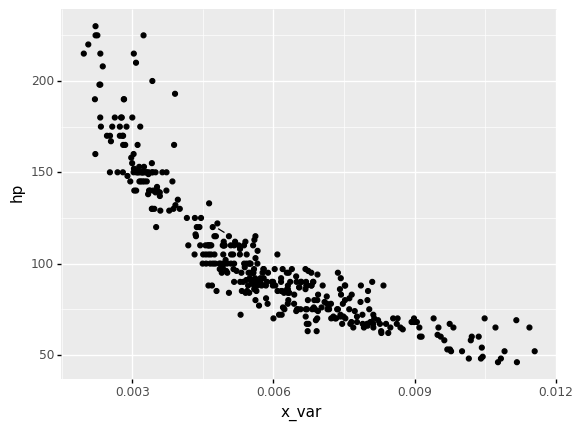

<ggplot: (3000147836742)>

In [17]:
# graph the model
x2 = df[['accel', 'weight', 'x_var']]

xvals1 = np.linspace(x2.accel.min(), x2.accel.max(), len(df)) # start, stop, numbers we want in array
xvals2 = np.linspace(x2.weight.min(), x2.weight.max(), len(df))
xvals = xvals1/xvals2
x_predict = pd.DataFrame({
    'x_var': xvals1/xvals2
})

y_predict = model.predict(x_predict)

pn.ggplot(df, pn.aes(x = 'x_var', y = 'hp')) + pn.geom_point() + pn.geom_line(mapping = pn.aes(x=xvals, y=y_predict))